# Laboratori Grup 6

### **Nom Alumne 1: Adriana Avilés**   <br>**NIU Alumne 1: 1676127**

### **Nom Alumne 2: Anna Garcia**   <br>**NIU Alumne 2: 1665817**

### **Nom Alumne 3: David Morillo**   <br>**NIU Alumne 3: 1666540**

### **Nom Alumne 4: Paula Franco**   <br>**NIU Alumne 4: 1674234**

Els objectiu d'aquest laboratori són:

1. Aprendre a treballar amb elements estructurants;
2. Entendre el funcionament del Hit-or-Miss;
3. Iniciar-se en l'aplicació de Thinning i Thickenning en imatges;
4. Familiaritzar-se amb les transformacions: _Contour_, _Convex Hull_,  _Skeleton_;

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import copy

Creem unes imatges personalitzades que facilitzarán la aplicació i visualització de resultats de les transformacions

In [62]:
def display_gray_256(img):
    plt.axis('off')
    plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

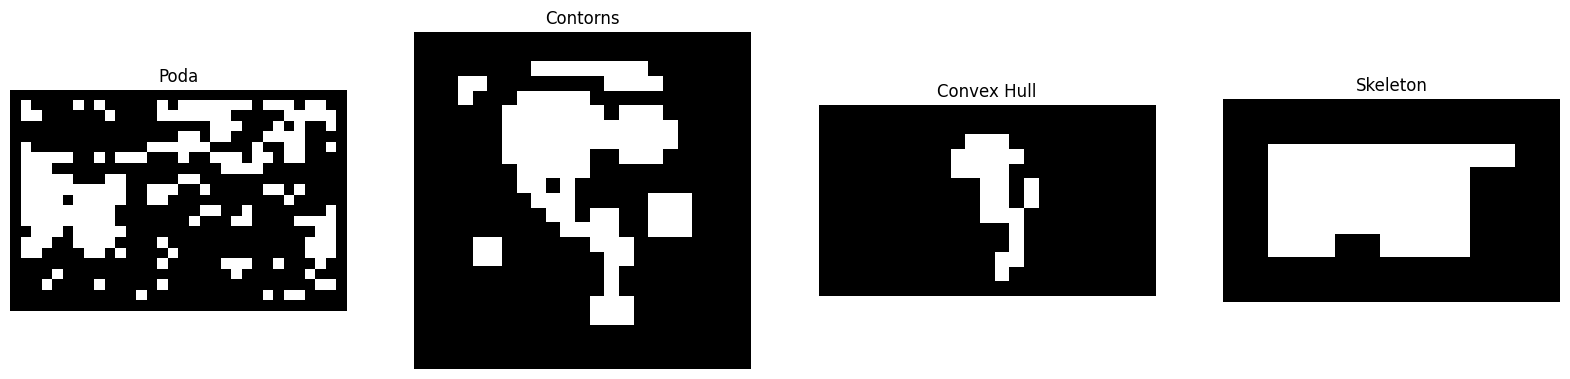

In [63]:
poda = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 255, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 0, 255, 0, 255, 255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 0, 255, 255, 0, 0],
                 [0, 255, 255, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 255, 0, 255, 0, 0, 255, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 255, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0],
                 [0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 255, 0, 0, 255, 255, 0, 0, 255, 0],
                 [0, 255, 255, 255, 255, 255, 0, 0, 255, 0, 255, 255, 255, 0, 0, 0, 255, 0, 0, 255, 255, 255, 0, 255, 255, 0, 255, 255, 0, 0, 0, 0],
                 [0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 255, 255, 255, 255, 255, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255, 255, 0, 0, 255, 0, 0, 0, 0, 0, 255, 255, 0, 255, 0, 0, 0, 0],
                 [0, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0],
                 [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 255, 0],
                 [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 255, 255, 0, 0, 0, 0, 255, 255, 255, 255, 0],
                 [0, 0, 255, 255, 255, 0, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0],
                 [0, 255, 255, 255, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0],
                 [0, 255, 255, 0, 0, 0, 0, 255, 255, 0, 255, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 255, 0, 0, 0, 255, 0, 0],
                 [0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0],
                 [0, 0, 0, 255, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 255, 255, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

contorns = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 255, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 255, 0, 0, 255, 255, 255, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 255, 255, 255, 0, 0, 0, 0],
                  [0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

convex = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],])

skeleton_img = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0],
                     [0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0],
                     [0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0],
                     [0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0],
                     [0, 0, 255, 255, 255, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

plt.figure(figsize=(20,5))

plt.subplot(1, 4, 1)
plt.imshow(poda, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Poda')

plt.subplot(1, 4, 2)
plt.imshow(contorns, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Contorns')

plt.subplot(1, 4, 3)
plt.imshow(convex, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Convex Hull')

plt.subplot(1, 4, 4)
plt.imshow(skeleton_img, cmap = "gray", vmin = 0, vmax = 255)
plt.axis('off')
plt.title('Skeleton')

plt.show()

# Tasques

### Els següents apartats son tasques que haureu de completar. (Els resultats es poden trobar dins del pdf de la teoria)

## Tasca 1 - Thinning and Thickenning

A la primera tasca a realitzar l'idea és aplicar un procés de Thinning a una imatge per fer una poda c4 dels pixels poc connectats.

Segons la fórmula de Thinning:

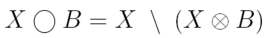

En la formula veiem que el Thinning es realitza aplican Hit-or-Miss a la imatge original i restant els resultats a aquesta (donant-li el valor 0 a aquells pixels que compleixin les condicions del conjunt). Recordem que per aplicar el Hit-or-Miss haviem de seguir uns passos:

1. Identificar quin és el pixel principal (que és sempre el central al filtre)
2. Identificar quins pixels formen part del foreground (que son els pixels més clars i en la imatge binaria han de ser blancs)
3. Identificar quins pixels formen part del background (que son els pixels més foscos i en la imatge binaria han de ser negres)
4. Comprobar que tant com el pixel central com els seus veïns compleixen les condicions especificades per el filtre
5. Si tots els pixels perteneixen als respectius foregrounds i backgrounds el pixel és un Hit si no, és un Miss


Per fer la poda realitzarem aquest procés amb els següents 4 conjunts fins la imdepotencia:

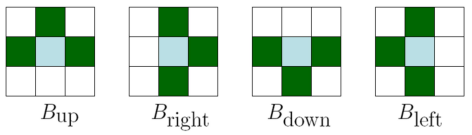

Aplica el codi en la cel·la següent (Bup ja està aplicat com a guia):

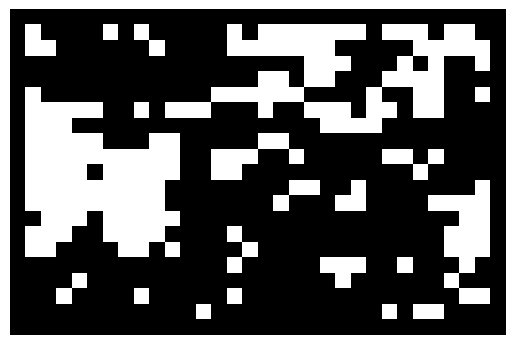

In [64]:
# Referència
display_gray_256(poda)

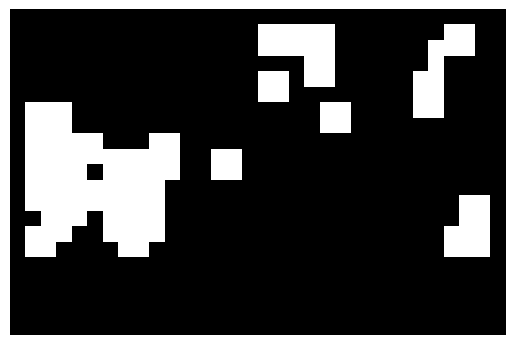

In [65]:
def Thinning(img):
  poda = copy.deepcopy(img)
  height, width = img.shape
  idempotencia = False
  while not idempotencia:
    idempotencia = True

    # Apliquem Bup
    hits = np.zeros(img.shape)
    for i in range(1, height - 1):
      for j in range(1, width - 1):
        if poda[i][j] == 255:
          if poda[i][j - 1] == 0 and poda[i][j + 1] == 0 and poda[i - 1][j] == 0:
            hits[i][j] = 255
            idempotencia = False

    poda = poda - hits

    # Apliquem Bright
    hits = np.zeros(img.shape)
    for i in range(1, height - 1):
      for j in range(1, width - 1):
        if poda[i][j] == 255:
          if poda[i - 1][j] == 0 and poda[i][j + 1] == 0 and poda[i + 1][j] == 0:
            hits[i][j] = 255
            idempotencia = False

    poda = poda - hits

    # Apliquem Bdown
    hits = np.zeros(img.shape)
    for i in range(1, height - 1):
      for j in range(1, width - 1):
        if poda[i][j] == 255:
          if poda[i][j - 1] == 0 and poda[i][j + 1] == 0 and poda[i + 1][j] == 0:
            hits[i][j] = 255
            idempotencia = False

    poda = poda - hits

    # Apliquem Bleft
    hits = np.zeros(img.shape)
    for i in range(1, height - 1):
      for j in range(1, width - 1):
        if poda[i][j] == 255:
          if poda[i - 1][j] == 0 and poda[i][j - 1] == 0 and poda[i + 1][j] == 0:
            hits[i][j] = 255
            idempotencia = False

    poda = poda - hits

  return poda

display_gray_256(Thinning(poda))

## Tasca 2 - Contour

Si recordem la presentació, la transformació _Contour_ tenia dos models, un de 4-conectivity i un de 8-conectivity. En aquesta tasca hem pogut crear una funció que ens retorna el contorn de la segona imatge amb connectivitat 4, però no ens sembla lo suficientment precís. Per aixó necessitem que en una funció a part es defineixi un algoritme que ens retorni el seu contorn amb connectivitat 8.

Recordem els filtres dels dos models de la transformació:

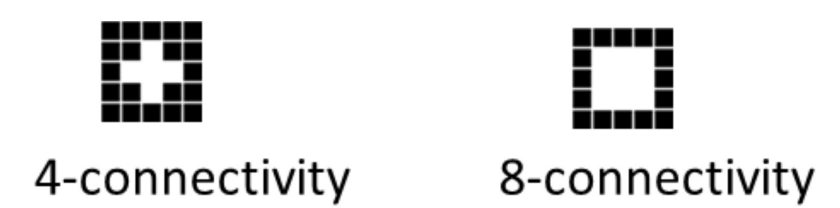

Aquí està el nostre codi a partir del qual et pots inspirar:

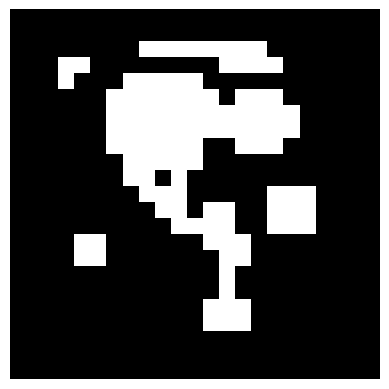

In [66]:
# Referència
display_gray_256(contorns)

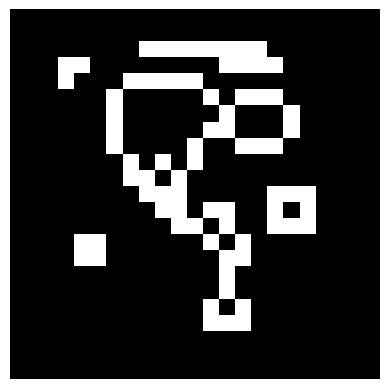

In [67]:
def contorn_4(img):
  contorns = copy.deepcopy(img)
  height, width = img.shape
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      if img[i][j] == 255:
        # Comprobem que els pixels dels costats, a la imatge original, siguin blancs
        if (img[i][j + 1] == 255) and (img[i][j - 1] == 255):
          # Comprobem que els pixels de sobre i sota, a la imatge original, siguin blancs
          if (img[i + 1][j] == 255) and (img[i - 1][j] == 255):
            # Modifiquem el valor del pixel a la imatge final
            contorns[i][j] = 0
  return contorns

display_gray_256(contorn_4(contorns))

Aqui et deixem la funció a emplenar:

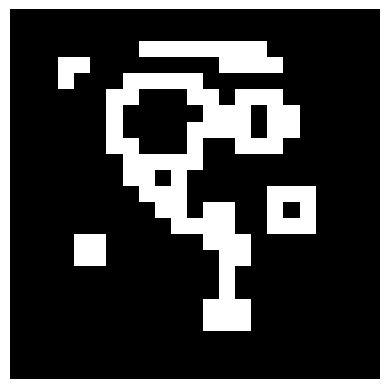

In [68]:
def contorn_8(img):
  contorns = copy.deepcopy(img)
  height, width = img.shape
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      if (img[i-1:i+2, j-1:j+2] == 255).all():
        contorns[i][j] = 0
  return contorns

display_gray_256(contorn_8(contorns))

## Tasca 3 - Convex Hull

Ara necessitem aplicar la transformació morfologica de _Convex Hull_ a la tercera imatge, per fer això haviem de seguir uns passos:

1. Creem una còpia de la imatge per a cada filtre.
2. Transformem les copies de la imatge aplicant iterativament cada element estructural fins la idempotencia.
3. Únim les imatges finals resultants en una sola per obtenir el resultat de la transformació.

No obstant només hem pogut aplicar la transformació amb B1 i necessitem que apliqueu la resta de transformacions.

Recordem els filtres de la transformació:

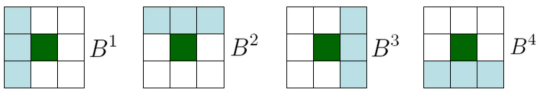

## **IMPORTANT!**
### A l'hora de modificar els valors de B1, B2, B3 i B4 recomanem donar als valors modificats un color gris com 127 en comptes del blanc 255, per poder visualitzar de manera més clara els canvis efectuats per el vostre codi. L'aplicació de B1 ja està feta d'aquesta manera per si necessiteu ajuda a l'hora d'implementar funció d'aquesta manera.

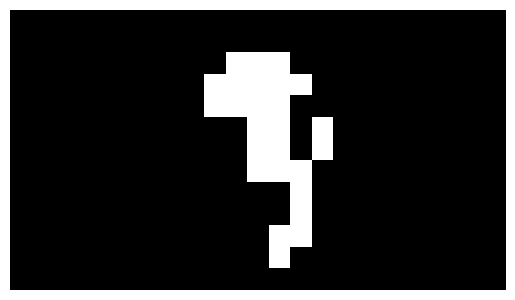

In [69]:
# Referència:
display_gray_256(convex)

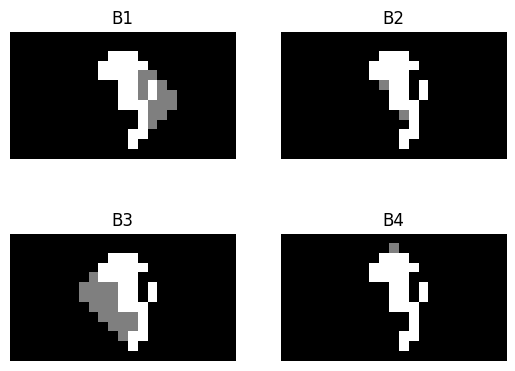

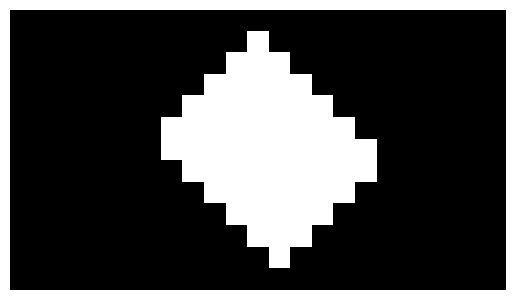

In [70]:
def convex_hull(img):
  convex = copy.deepcopy(img)
  B1 = copy.deepcopy(img)
  B2 = copy.deepcopy(img)
  B3 = copy.deepcopy(img)
  B4 = copy.deepcopy(img)
  height, width = img.shape

  # Apliquem B1
  cambio = True
  anterior = copy.deepcopy(B1)
  while cambio:
    cambio = False
    for i in range(1, height - 1):
      for j in range(1, width - 1):
        if anterior[i][j] == 0:
          # Comprobem de un en un (per estalviar iteracions innecesàries) els tres pixels a l'esquerra de l'actual
          if anterior[i + 1][j - 1] > 0:
            if anterior[i][j - 1] > 0:
              if anterior[i - 1][j - 1] > 0:
                # Definim el nou valor del pixel (127 ja que així podem visualitzar millor els resultats de cada filtre)
                B1[i][j] = 127
                # Avisem al codi de que s'han realitzat canvis a la imatge i que encara no som a la idempotencia
                cambio = True

    # Si hem realitzat canvis a la imatge canviem el pas anterior per iterar sobre ell en la següent iteració
    if cambio:
      anterior = copy.deepcopy(B1)

  # Apliquem B2
  cambio = True
  anterior = copy.deepcopy(B2)
  while cambio:
    cambio = False
    for i in range(1, height - 1):
      for j in range(1, width - 1):
        if anterior[i][j] == 0:
          if anterior[i - 1][j - 1] > 0:
            if anterior[i - 1][j] > 0:
              if anterior[i - 1][j + 1] > 0:
                B2[i][j] = 127
                cambio = True

    if cambio:
      anterior = copy.deepcopy(B2)

  # Apliquem B3
  cambio = True
  anterior = copy.deepcopy(B3)
  while cambio:
    cambio = False
    for i in range(1, height - 1):
      for j in range(1, width - 1):
        if anterior[i][j] == 0:
          if anterior[i - 1][j + 1] > 0:
            if anterior[i][j + 1] > 0:
              if anterior[i + 1][j + 1] > 0:
                B3[i][j] = 127
                cambio = True

    if cambio:
      anterior = copy.deepcopy(B3)
      
  # Apliquem B4
  cambio = True
  anterior = copy.deepcopy(B4)
  while cambio:
    cambio = False
    for i in range(1, height - 1):
      for j in range(1, width - 1):
        if anterior[i][j] == 0:
          if (anterior[i + 1][j - 1:j + 2] > 0).all():
            B4[i][j] = 127
            cambio = True

    if cambio:
      anterior = copy.deepcopy(B4)

  # Unim els resultats de totes les transformacions sobre la imatge original
  for matriu in [B1, B2, B3, B4]:
    for i in range(matriu.shape[0]):
      for j in range(matriu.shape[1]):
        if matriu[i][j] > 0:
          convex[i][j] = 255

  # No cambieu aquesta part de la funció, la seva funció és mostrar el resultat final d'aplicar
  # cada transformació per facilitar la correcció i comprobació del correcte funcionament del codi
  fig, axs = plt.subplots(2, 2)
  axs[0, 0].imshow(B1, cmap = "gray", vmin = 0, vmax = 255)
  axs[0, 0].axis('off')
  axs[0, 0].set_title('B1')

  axs[0, 1].imshow(B2, cmap = "gray", vmin = 0, vmax = 255)
  axs[0, 1].axis('off')
  axs[0, 1].set_title('B2')

  axs[1, 0].imshow(B3, cmap = "gray", vmin = 0, vmax = 255)
  axs[1, 0].axis('off')
  axs[1, 0].set_title('B3')

  axs[1, 1].imshow(B4, cmap = "gray", vmin = 0, vmax = 255)
  axs[1, 1].axis('off')
  axs[1, 1].set_title('B4')

  plt.show()

  return convex

display_gray_256(convex_hull(convex))

## Tasca 4 - Skeleton

Per últim volem aplicar la transfomació _Skeleton_ a l'última imatge. Per fer això necessitavem aplicar 8 filtres iterativament a la imatge fins la idempotencia. Tenint en compte els coneixements que heu adquirit dissenyant els algoritmes de _Thinning_ i de _Convex Hull_ haurieu de ser capaços de fer aquesta funció sense cap ajuda.

Per fer-ho recordeu que els filtres de la transformació son els següents:

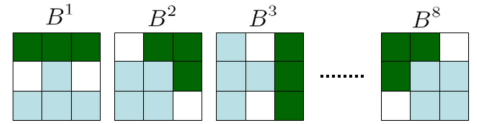

### **Nota:** Si afegiu un break al final de la primera iteració. la funció retornarà el primer pàs de la transformació, el qual teniu a la presentació del campus. Això us pot ajudar a comprovar que la funció fa el treball dessitjat.

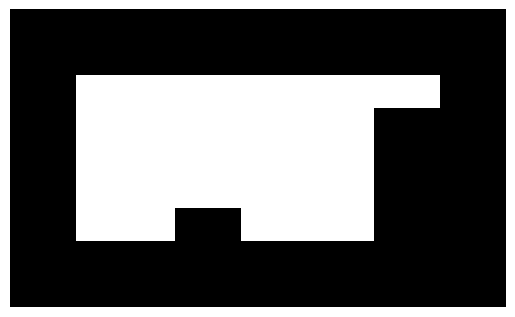

In [71]:
# Referència:
display_gray_256(skeleton_img)

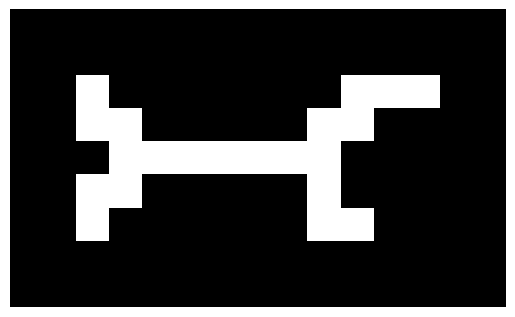

In [72]:
def skeleton(img):    
    
    sk = np.array(copy.deepcopy(img))
    height, width = img.shape
    idempotencia = False
    while not idempotencia:
        idempotencia = True

        # Apliquem B1
        hits = np.zeros(img.shape)
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if (sk[i][j] == 255 and
                    sk[i+1][j-1] == 255 and sk[i+1][j] == 255 and sk[i+1][j+1] == 255 and
                    sk[i-1][j-1] == 0 and sk[i-1][j] == 0 and sk[i-1][j+1] == 0):
                    hits[i][j] = 255
                    idempotencia = False
        sk = sk - hits
        
        # Apliquem B2         
        hits = np.zeros(img.shape)
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if (sk[i][j] == 255 and
                    sk[i][j-1] == 255 and sk[i+1][j] == 255 and sk[i+1][j-1] == 255 and
                    sk[i-1][j] == 0 and sk[i-1][j+1] == 0 and sk[i][j+1] == 0):
                    hits[i][j] = 255
                    idempotencia = False
        sk = sk - hits
          
        # Apliquem B3       
        hits = np.zeros(img.shape)
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if (sk[i][j] == 255 and
                    sk[i-1][j-1] == 255 and sk[i][j-1] == 255 and sk[i+1][j-1] == 255 and
                    sk[i-1][j+1] == 0 and sk[i][j+1] == 0 and sk[i+1][j+1] == 0):
                    hits[i][j] = 255
                    idempotencia = False
        sk = sk - hits
        
        # Apliquem B4
        hits = np.zeros(img.shape)
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if (sk[i][j] == 255 and
                    sk[i-1][j-1] == 255 and sk[i-1][j] == 255 and sk[i][j-1] == 255 and
                    sk[i][j+1] == 0 and sk[i+1][j] == 0 and sk[i+1][j+1] == 0):
                    hits[i][j] = 255
                    idempotencia = False
        sk = sk - hits
        
        # Apliquem B5
        hits = np.zeros(img.shape)
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if (sk[i][j] == 255 and
                    sk[i-1][j-1] == 255 and sk[i-1][j] == 255 and sk[i-1][j+1] == 255 and
                    sk[i+1][j-1] == 0 and sk[i+1][j] == 0 and sk[i+1][j+1] == 0):
                    hits[i][j] = 255
                    idempotencia = False
        sk = sk - hits
        
        # Apliquem B6
        hits = np.zeros(img.shape)
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if (sk[i][j] == 255 and
                    sk[i-1][j] == 255 and sk[i-1][j+1] == 255 and sk[i][j+1] == 255 and
                    sk[i][j-1] == 0 and sk[i+1][j-1] == 0 and sk[i+1][j] == 0):
                    hits[i][j] = 255
                    idempotencia = False
        sk = sk - hits
                                
        # Apliquem B7
        hits = np.zeros(img.shape)
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if (sk[i][j] == 255 and
                    sk[i-1][j+1] == 255 and sk[i][j+1] == 255 and sk[i+1][j+1] == 255 and
                    sk[i-1][j-1] == 0 and sk[i][j-1] == 0 and sk[i+1][j-1] == 0):
                    hits[i][j] = 255
                    idempotencia = False
        sk = sk - hits
        
        # Apliquem B8
        hits = np.zeros(img.shape)
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if (sk[i][j] == 255 and
                    sk[i][j+1] == 255 and sk[i+1][j+1] == 255 and sk[i+1][j] == 255 and
                    sk[i-1][j-1] == 0 and sk[i-1][j] == 0 and sk[i][j-1] == 0):
                    hits[i][j] = 255
                    idempotencia = False
        sk = sk - hits
        
    return sk

display_gray_256(skeleton(skeleton_img))